In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [2]:
# creating the data set
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=20, random_state=24)

# splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=24) 

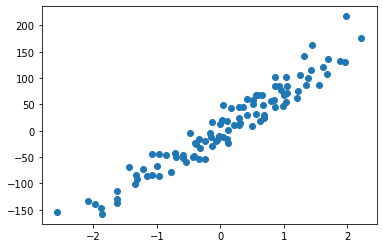

In [3]:
# visualize 
plt.scatter(X, y)
plt.show() 

In [4]:
def param_init(X): 
    """
    Initialize parameters for linear regression model
    __________________ 
    Input(s)
    X: Training data
    __________________
    Output(s)
    params: Dictionary containing coefficients
    """
    params = {} # initialize dictionary 
    _, n_features = X.shape # shape of training data

    # initializing coefficents to 0 
    params["W"] = np.zeros(n_features)
    params["b"] = 0
    return params 

In [5]:
def gradient_descent(X, y, params, alpha, n_iter): 
    """
    Gradient descent to minimize cost function
    __________________ 
    Input(s)
    X: Training data
    y: Labels
    params: Dictionary contatining random coefficients
    alpha: Model learning rate
    __________________
    Output(s)
    params: Dictionary containing optimized coefficients
    """
    W = params["W"] 
    b = params["b"]
    m = X.shape[0] # number of training instances 

    for _ in range(n_iter): 
        # prediction with random weights
        y_pred = np.dot(X, W) + b
        # taking the partial derivative of coefficients
        dW = (2/m) * np.dot(X.T, (y_pred - y)) 
        db = (2/m) * np.sum(y_pred -  y)
        # updates to coefficients
        W -= alpha * dW
        b -= alpha * db 
    
    params["W"] = W
    params["b"] = b
    return params 

In [6]:
def train(X, y, alpha=0.01, n_iter=1000):
    """
    Train Linear Regression model with Gradient decent
    __________________ 
    Input(s)
    X: Training data
    y: Labels
    alpha: Model learning rate
    n_iter: Number of iterations 
    __________________
    Output(s)
    params: Dictionary containing optimized coefficients
    """ 
    init_params = param_init(X)
    params = gradient_descent(X, y, init_params, alpha, n_iter)
    return params

In [7]:
def predict(X_test, params):
    """
    Train Linear Regression model with Gradient decent
    __________________ 
    Input(s)
    X: Unseen data
    params: Dictionary contianing optimized weights from training
    __________________
    Output(s)
    y_preds: Predictions of model
    """  
    y_preds = np.dot(X_test, params["W"]) + params["b"]
    return y_preds

In [8]:
params = train(X_train, y_train) # train model
y_preds = predict(X_test, params) # inference

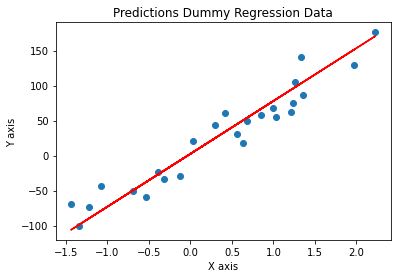

In [9]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_preds, color="red")
plt.title("Predictions Dummy Regression Data")
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show() 

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
sklearn_y_preds = lin_reg.predict(X_test)

In [11]:
print(f"My implementation: {np.sqrt(mean_squared_error(y_test, y_preds))}\nSklearn implementation: {np.sqrt(mean_squared_error(y_test, sklearn_y_preds))}")

My implementation: 20.986105292320207
Sklearn implementation: 20.98610530754737


## Object Oriented Programming (OOB)

In [12]:
class LinReg(): 
    """
    Custom made Linear Regression class
    """
    def __init__(self, alpha=0.01, n_iter= 1000): 
        self.alpha = alpha
        self.n_iter = n_iter 
        self.params = {}
    
    def param_init(self, X_train): 
        """
        Initialize parameters for linear regression model
        __________________ 
        Input(s)
        X: Training data
        """
        _, n_features = self.X.shape # shape of training data

        # initializing coefficents to 0 
        self.params["W"] = np.zeros(n_features)
        self.params["b"] = 0
        return self
        

    def gradient_descent(self, X_train, y_train): 
        """
        Gradient descent to minimize cost function
        __________________ 
        Input(s)
        X: Training data
        y: Labels
        params: Dictionary contatining random coefficients
        alpha: Model learning rate
        __________________
        Output(s)
        params: Dictionary containing optimized coefficients
        """
        W = self.params["W"] 
        b = self.params["b"] 
        m = X_train.shape[0]

        for _ in range(self.n_iter): 
            # prediction with random weights
            y_pred = np.dot(X_train, W) + b
            # taking the partial derivative of coefficients
            dW = (2/m) * np.dot(X_train.T, (y_pred - y_train)) 
            db = (2/m) * np.sum(y_pred -  y_train)
            # updates to coefficients
            W -= self.alpha * dW
            b -= self.alpha * db 
        
        self.params["W"] = W
        self.params["b"] = b
        return self

    def train(self, X_train, y_train):
        """
        Train Linear Regression model with Gradient decent
        __________________ 
        Input(s)
        X: Training data
        y: Labels
        alpha: Model learning rate
        n_iter: Number of iterations 
        __________________
        Output(s)
        params: Dictionary containing optimized coefficients
        """ 
        self.params = param_init(X_train)
        gradient_descent(X_train, y_train, self.params , self.alpha, self.n_iter)
        return self 

    def predict(self, X_test):
        """
        Train Linear Regression model with Gradient decent
        __________________ 
        Input(s)
        X: Unseen data
        params: Dictionary contianing optimized weights from training
        __________________
        Output(s)
        y_preds: Predictions of model
        """  
        y_preds = np.dot(X_test, self.params["W"]) + self.params["b"]
        return y_preds

In [13]:
linreg = LinReg()
linreg.train(X_train, y_train)
linreg.predict(X_test)

array([   4.73888182,  -90.06369632,   80.39799712,   66.76983607,
        -49.97207144,   93.77905208,   34.30778991,  -38.2209702 ,
         78.03331698,   53.81416352,  102.96993005,  151.71946744,
         95.52801857,  104.82707085,   98.0492089 ,   45.05150211,
         -7.29917923,  -78.41675446,  -27.14118529,  -98.52923336,
        170.75840972, -106.22126739,   24.86194847,  -21.39127805,
         50.24074837])

In [182]:
linreg.predict(X_test) == y_preds 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])